In [1]:
import os

In [2]:
import matplotlib.pyplot as plt

In [96]:
# !pip install lifelines

In [11]:
import pandas as pd

In [7]:
df1 = pd.read_csv("lung.csv")

In [8]:
df1.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [9]:
df1.loc[df1['status'] == 1,'status'] = 0

In [10]:
df1.loc[df1['status'] == 2,'status'] = 1

In [11]:
df1.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [12]:
from lifelines import KaplanMeierFitter as KMF

In [13]:
model1 = KMF().fit(durations = df1['time'], event_observed = df1['status'])

In [14]:
?model1

Type:        KaplanMeierFitter
String form: <lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>
File:        ~/miniconda3/lib/python3.11/site-packages/lifelines/fitters/kaplan_meier_fitter.py
Docstring:  
Class for fitting the Kaplan-Meier estimate for the survival function.

Parameters
----------
alpha: float, optional (default=0.05)
    The alpha value associated with the confidence intervals.
label: string, optional
    Provide a new label for the estimate - useful if looking at many groups.

Examples
--------
.. code:: python

    from lifelines import KaplanMeierFitter
    from lifelines.datasets import load_waltons
    waltons = load_waltons()

    kmf = KaplanMeierFitter(label="waltons_data")
    kmf.fit(waltons['T'], waltons['E'])
    kmf.plot()


Attributes
----------
survival_function_ : DataFrame
    The estimated survival function (with custom timeline if provided)
median_survival_time_ : float
    The estimated me

In [15]:
model1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


Basically above table is like this:

Event At is the number of days. We start with 228 patients, in 5 days 1 died. So we got observed at 1, we also removed 1 then leaving 227 patients. Similarly at 13th day 2 died so we removed 2.

At 840 and other we got censored at 1, this means that we don't know what happens with the patient, they can be removed from study or die. We just remove them in kepler meier table.

In [16]:
#Probability of Surviving for day 5, 100, and 965
p5 = 1*(1 - 1/228)
print(p5)

0.9956140350877193


In [17]:
p_surviving = [1]
p_surviving.append(1*(1 - 1/228))
for i in range(2, model1.event_table.shape[0]):
    p_surviving.append(p_surviving[i-1]*(1 - model1.event_table.iloc[i,:]['observed']/model1.event_table.iloc[i,:]['at_risk']))

In [18]:
surv_table = model1.event_table

In [19]:
surv_table['p_surv'] = p_surviving

In [20]:
surv_table

,removed,observed,censored,entrance,at_risk,p_surv
event_at,,,,,,
0.0,0,0,0,228,228,1.000000
5.0,1,1,0,0,228,0.995614
11.0,3,3,0,0,227,0.982456
12.0,1,1,0,0,224,0.978070
13.0,2,2,0,0,223,0.969298
...,...,...,...,...,...,...
840.0,1,0,1,0,5,0.067127
883.0,1,1,0,0,4,0.050346
965.0,1,0,1,0,3,0.050346


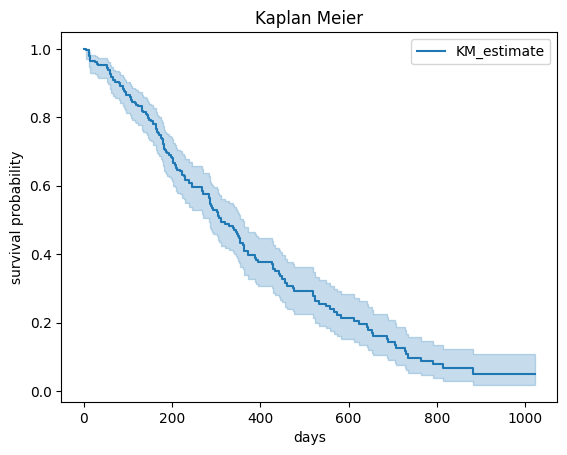

In [21]:
model1.plot()
plt.title('Kaplan Meier')
plt.xlabel('days')
plt.ylabel('survival probability')
plt.show()

Log Rank Test

In [23]:
df1_male = df1[df1['sex']== 1]
df1_female = df1[df1['sex']== 2]

In [24]:
df1_male.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [25]:
kmf_male = KMF().fit(durations = df1_male['time'], event_observed = df1_male['status'])
kmf_female = KMF().fit(durations = df1_female['time'], event_observed = df1_female['status'])

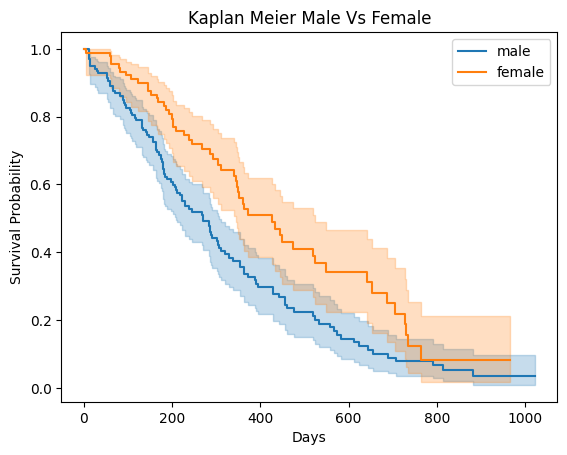

In [26]:
kmf_male.plot(label = 'male')
kmf_female.plot(label = 'female')
plt.title('Kaplan Meier Male Vs Female')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.show()

In [27]:
from lifelines.statistics import logrank_test

In [28]:
import numpy as np

In [29]:
logrank_test(
    durations_A = df1_male.time,
    durations_B = df1_female.time,
    event_observed_A = df1_male.status,
    event_observed_B = df1_female.status)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

Solder DF Challenge

In [30]:
df_solder = pd.read_csv('solder.csv')

In [31]:
df_solder.head()

,Opening,Solder,Mask,PadType,Panel,skips
0,L,Thick,A1.5,W4,1,0
1,L,Thick,A1.5,W4,2,0
2,L,Thick,A1.5,W4,3,0
3,L,Thick,A1.5,D4,1,0
4,L,Thick,A1.5,D4,2,0


In [32]:
df_solder['Solder'] = np.where(df_solder['Solder'] == 'Thin', 1, 0)

In [33]:
df_solder.head()

,Opening,Solder,Mask,PadType,Panel,skips
0,L,0,A1.5,W4,1,0
1,L,0,A1.5,W4,2,0
2,L,0,A1.5,W4,3,0
3,L,0,A1.5,D4,1,0
4,L,0,A1.5,D4,2,0


In [34]:
df_solder.dtypes

Opening    object
Solder      int64
Mask       object
PadType    object
Panel       int64
skips       int64
dtype: object

In [35]:
kmf_solder = KMF().fit(durations = df_solder.skips, event_observed = df_solder.Solder)
kmf_solder.event_table.head()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,285,82,203,900,900
1.0,123,54,69,0,615
2.0,90,43,47,0,492
3.0,45,29,16,0,402
4.0,42,28,14,0,357


<Axes: xlabel='timeline'>

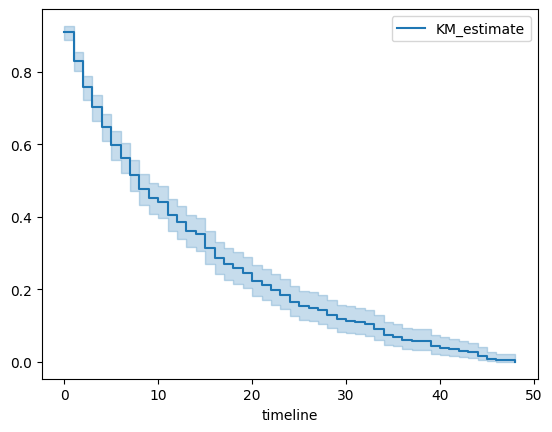

In [36]:
kmf_solder.plot()

In [37]:
from lifelines.statistics import multivariate_logrank_test

In [38]:
multivariate_logrank_test(event_durations = df_solder['skips'], groups = df_solder['Panel'], event_observed = df_solder['Solder'])

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           6.84 0.03      4.93

#Cox

In [39]:
from lifelines import CoxPHFitter as CoxPHF

In [40]:
df1.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [41]:
df1_cox = df1

In [42]:
df1_cox = df1_cox.dropna()

In [43]:
df1_cox = df1_cox.drop(columns = 'inst')

In [44]:
model_cox_cancer = CoxPHF().fit(df1_cox, 'time', event_col = 'status')
model_cox_cancer.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2023-09-27 06:05:17 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  0.93   0.35       1.51
sex           0.00 -2.75   0.01       7.37
ph.ecog       0.00  3.29 <0.005       9.95
ph.karno      0.00  2.00   0.05       4.45
pat.karno     0.00 -1.49   0.14       2.87
meal.cal      0.00  0.11   0.91       0.13
wt.loss       0.00 -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

<Axes: xlabel='log(HR) (95% CI)'>

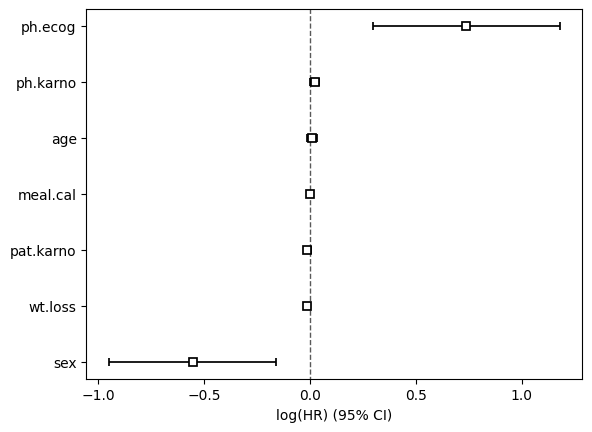

In [45]:
model_cox_cancer.plot()

In [46]:
df_veteran = pd.read_csv('/mnt/c/Users/anubh/Downloads/Data Mining for Business in Python/2. Cox Proportional Hazard Regression/veteran.csv')

In [47]:
df_veteran.head()

,trt,celltype,time,status,karno,diagtime,age,prior
0,1,squamous,72,1,60,7,69,0
1,1,squamous,411,1,70,5,64,10
2,1,squamous,228,1,60,3,38,0
3,1,squamous,126,1,60,9,63,10
4,1,squamous,118,1,70,11,65,10


In [48]:
df_veteran = pd.get_dummies(df_veteran, columns = ['celltype'], drop_first = True)

In [49]:
df_veteran.head()

,trt,time,status,karno,diagtime,age,prior,celltype_large,celltype_smallcell,celltype_squamous
0,1,72,1,60,7,69,0,False,False,True
1,1,411,1,70,5,64,10,False,False,True
2,1,228,1,60,3,38,0,False,False,True
3,1,126,1,60,9,63,10,False,False,True
4,1,118,1,70,11,65,10,False,False,True


In [50]:
model_veteran = CoxPHF().fit(df = df_veteran, duration_col = 'time', event_col = 'status')
model_veteran.print_summary()

<lifelines.CoxPHFitter: fitted with 137 total observations, 9 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 137
number of events observed = 128
   partial log-likelihood = -474.40
         time fit was run = 2023-09-27 06:05:21 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
trt                  0.29       1.34       0.21            -0.11             0.70                 0.89                 2.02
karno               -0.03       0.97       0.01            -0.04            -0.02                 0.96                 0.98
diagtime             0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
age                 -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
prior                0.01       1.01       0.02            -0.04             0.05                 0.96                 1.05
celltype_large      -0.79       0.45       0.30            -1.39            -0.20                 0.25                 0.82
celltype_smallcell  -0.33       0.72       0.28            -0.88             0.21                 0.42                 1.23
celltype_squamous   -1.20       0.30       0.30            -1.79            -0.61                 0.17                 0.55

                     cmp to     z      p   -log2(p)
covariate                                          
trt                    0.00  1.42   0.16       2.68
karno                  0.00 -5.96 <0.005      28.55
diagtime               0.00  0.01   0.99       0.01
age                    0.00 -0.94   0.35       1.52
prior                  0.00  0.31   0.76       0.40
celltype_large         0.00 -2.62   0.01       6.85
celltype_smallcell     0.00 -1.21   0.23       2.15
celltype_squamous      0.00 -3.97 <0.005      13.79
---
Concordance = 0.74
Partial AIC = 964.79
log-likelihood ratio test = 62.10 on 8 df
-log2(p) of ll-ratio test = 32.37

<Axes: xlabel='log(HR) (95% CI)'>

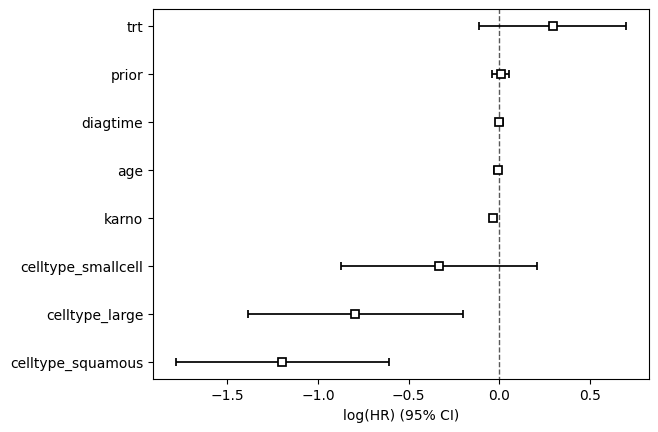

In [51]:
model_veteran.plot()

In [52]:
# !pip install chaid
# !pip install orca
# !pip install graphviz

In [60]:
# !pip install plotly>=4.0.0
# !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
# !chmod +x /usr/local/bin/orca
# !apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [53]:
import orca
import plotly
import plotly.graph_objects as go

In [54]:
# !pip install statsmodels

In [55]:
import statsmodels.api as sm
from CHAID import Tree

/home/anubh/miniconda3/lib/python3.11/site-packages/CHAID/graph.py:13: UserWarning: Imports of optional packages needed to generate graphs failed. Please install with the "graph" option.
  warnings.warn(UserWarning('Imports of optional packages needed to generate graphs failed. Please install with the "graph" option.'))


In [56]:
df_resume = sm.datasets.get_rdataset("ResumeNames", package = "AER").data 
df_resume.head()                               

,name,gender,ethnicity,quality,call,city,jobs,experience,honors,volunteer,...,minimum,equal,wanted,requirements,reqexp,reqcomm,reqeduc,reqcomp,reqorg,industry
0,Allison,female,cauc,low,no,chicago,2,6,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
1,Kristen,female,cauc,high,no,chicago,3,6,no,yes,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
2,Lakisha,female,afam,low,no,chicago,1,6,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
3,Latonya,female,afam,high,no,chicago,4,6,no,yes,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
4,Carrie,female,cauc,high,no,chicago,3,22,no,no,...,some,yes,secretary,yes,yes,no,no,yes,yes,health/education/social services


CHAID is essentially a Decision Tree where instead of using Metrics like Information Gain and Gini Impurity we are using Chi Square test to find the most important parameter or variable at a level.

For example let's suppose in the above dataset for Resumes, we pick honors predictor and the call = yes as the targeted dependent variable. Here using two categorial variables we will form Chi Square and if we compare Call with other categorial variables and found that honor/call has highest Chi Square statistic we will pick honors in the first level and also for the Call = no for the first level.

In [57]:
df_resume = df_resume.drop(columns = 'name')

In [58]:
df_resume.apply(pd.Series.nunique)

gender           2
ethnicity        2
quality          2
call             2
city             2
jobs             7
experience      26
honors           2
volunteer        2
military         2
holes            2
school           2
email            2
computer         2
special          2
college          2
minimum         13
equal            2
wanted           6
requirements     2
reqexp           2
reqcomm          2
reqeduc          2
reqcomp          2
reqorg           2
industry         7
dtype: int64

In [59]:
import seaborn as sns

/home/anubh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anubh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='jobs', ylabel='Density'>

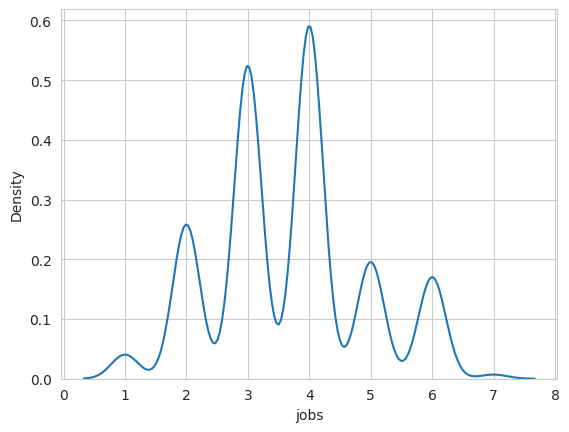

In [60]:
sns.set_style('whitegrid')
sns.kdeplot(df_resume.jobs)

In [61]:
df_resume['jobs'] = pd.cut(x = df_resume.jobs, bins = [-1, 2.9, 4.9, 50], labels = [0,1,2])
df_resume['jobs'] = pd.factorize(df_resume.jobs)[0]
df_resume['jobs'].head()

0    0
1    1
2    0
3    1
4    1
Name: jobs, dtype: int64

/home/anubh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anubh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='experience', ylabel='Density'>

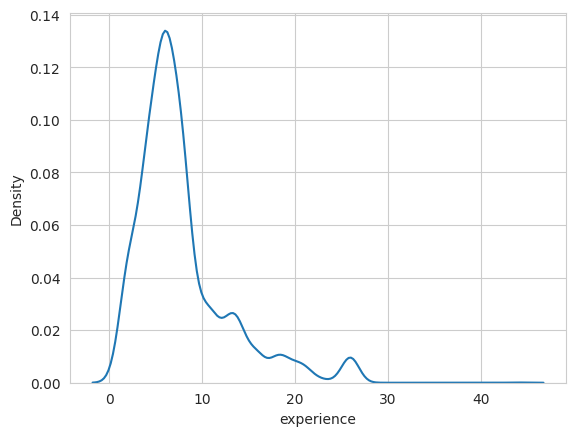

In [62]:
sns.set_style('whitegrid')
sns.kdeplot(df_resume.experience)

In [63]:
df_resume['experience'] = pd.qcut(x = df_resume.experience, q = 3 , labels = [0,1,2])
df_resume['experience'] = pd.factorize(df_resume['experience'])[0]
df_resume['experience'].head()

0    0
1    0
2    0
3    0
4    1
Name: experience, dtype: int64

In [64]:
df_resume['minimum'].value_counts()

minimum
none    2746
some    1064
2        356
3        331
5        163
1        142
10        18
7         12
8         10
0.5        8
4          8
6          8
0          4
Name: count, dtype: int64

In [65]:
#Transform minimum variable
replacement_dictionary = {'none': 0,
                          '0': 0,
                          '0.5': 0,
                          '1': 1,
                          '2': 1,
                          'some': 2,
                          '3': 2,
                          '4': 2,
                          '5': 3,
                          '6': 3,
                          '7': 3,
                          '8': 3,
                          '10': 3}
df_resume['minimum'] = df_resume['minimum'].replace(replacement_dictionary)
df_resume['minimum'].head()      

0    3
1    3
2    3
3    3
4    2
Name: minimum, dtype: int64

In [107]:
df_resume.head()

,jobs,experience,minimum,gender_male,ethnicity_cauc,quality_low,call_yes,city_chicago,honors_yes,volunteer_yes,...,reqcomm_yes,reqeduc_yes,reqcomp_yes,reqorg_yes,industry_finance/insurance/real estate,industry_health/education/social services,industry_manufacturing,industry_trade,industry_transport/communication,industry_unknown
0,0,0,3,False,True,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1,1,0,3,False,True,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,False
2,0,0,3,False,False,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3,1,0,3,False,False,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,False
4,1,1,2,False,True,False,False,True,False,False,...,False,False,True,True,False,True,False,False,False,False


In [77]:
df_resume.dtypes

jobs                                         int64
experience                                   int64
minimum                                      int64
gender_male                                   bool
ethnicity_cauc                                bool
quality_low                                   bool
call_yes                                      bool
city_chicago                                  bool
honors_yes                                    bool
volunteer_yes                                 bool
military_yes                                  bool
holes_yes                                     bool
school_yes                                    bool
email_yes                                     bool
computer_yes                                  bool
special_yes                                   bool
college_yes                                   bool
equal_yes                                     bool
wanted_office support                         bool
wanted_other                   

In [78]:
df_resume = pd.get_dummies(df_resume, drop_first = True)

In [79]:
df_resume.columns

Index(['jobs', 'experience', 'minimum', 'gender_male', 'ethnicity_cauc',
       'quality_low', 'call_yes', 'city_chicago', 'honors_yes',
       'volunteer_yes', 'military_yes', 'holes_yes', 'school_yes', 'email_yes',
       'computer_yes', 'special_yes', 'college_yes', 'equal_yes',
       'wanted_office support', 'wanted_other', 'wanted_retail sales',
       'wanted_secretary', 'wanted_supervisor', 'requirements_yes',
       'reqexp_yes', 'reqcomm_yes', 'reqeduc_yes', 'reqcomp_yes', 'reqorg_yes',
       'industry_finance/insurance/real estate',
       'industry_health/education/social services', 'industry_manufacturing',
       'industry_trade', 'industry_transport/communication',
       'industry_unknown'],
      dtype='object')

In [80]:
y_name = df_resume['call_yes'].name

In [81]:
X_name = df_resume.drop(columns = 'call_yes').columns
print(X_name)
print(len(X_name))

Index(['jobs', 'experience', 'minimum', 'gender_male', 'ethnicity_cauc',
       'quality_low', 'city_chicago', 'honors_yes', 'volunteer_yes',
       'military_yes', 'holes_yes', 'school_yes', 'email_yes', 'computer_yes',
       'special_yes', 'college_yes', 'equal_yes', 'wanted_office support',
       'wanted_other', 'wanted_retail sales', 'wanted_secretary',
       'wanted_supervisor', 'requirements_yes', 'reqexp_yes', 'reqcomm_yes',
       'reqeduc_yes', 'reqcomp_yes', 'reqorg_yes',
       'industry_finance/insurance/real estate',
       'industry_health/education/social services', 'industry_manufacturing',
       'industry_trade', 'industry_transport/communication',
       'industry_unknown'],
      dtype='object')
34


In [73]:
df_resume.head()

,jobs,experience,minimum,gender_male,ethnicity_cauc,quality_low,call_yes,city_chicago,honors_yes,volunteer_yes,...,reqcomm_yes,reqeduc_yes,reqcomp_yes,reqorg_yes,industry_finance/insurance/real estate,industry_health/education/social services,industry_manufacturing,industry_trade,industry_transport/communication,industry_unknown
0,0,0,3,False,True,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1,1,0,3,False,True,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,False
2,0,0,3,False,False,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3,1,0,3,False,False,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,False
4,1,1,2,False,True,False,False,True,False,False,...,False,False,True,True,False,True,False,False,False,False


In [84]:
model_resume = Tree.from_pandas_df(df = df_resume, i_variables = dict(zip(X_name, ['ordinal']*3 + ['nominal']*31)),
                                   d_variable = y_name, max_depth = 3, min_child_node_size = 250)

In [93]:
model_resume

[([], {False: 4478.0, True: 392.0}, (special_yes, p=9.09108860261878e-15, score=60.08363933760746, groups=[[False], [True]]), dof=1)), ([False], {False: 3075.0, True: 194.0}, (requirements_yes, p=0.0002718068476768014, score=13.25532368278205, groups=[[False], [True]]), dof=1)), ([False], {False: 576.0, True: 57.0}, (experience, p=0.003975225728095155, score=8.295096983690131, groups=[[0], [1, 2]]), dof=1)), ([0], {False: 346.0, True: 23.0}, <Invalid Chaid Split> - the max depth has been reached), ([1, 2], {False: 230.0, True: 34.0}, <Invalid Chaid Split> - the max depth has been reached), ([True], {False: 2499.0, True: 137.0}, (ethnicity_cauc, p=0.03903799830275106, score=4.2592132081738185, groups=[[False], [True]]), dof=1)), ([False], {False: 1266.0, True: 57.0}, <Invalid Chaid Split> - the max depth has been reached), ([True], {False: 1233.0, True: 80.0}, <Invalid Chaid Split> - the max depth has been reached), ([True], {False: 1403.0, True: 198.0}, (city_chicago, p=0.0003119135961

In [94]:
%cd /mnt/c/Users/anubh/Downloads/Data Mining for Business in Python

/mnt/c/Users/anubh/Downloads/Data Mining for Business in Python


In [106]:
model_resume.render(path = None, view = None)

TypeError: 'NoneType' object is not callable

In [97]:
!pip install networkx

/bin/bash: /home/anubh/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.5 MB/s eta 0:00:0000:0100:01


In [105]:
import networkx

In [103]:
from networkx import DiGraph as Digraph

In [90]:
import orca
import plotly
import plotly.graph_objects as go

In [96]:
?Digraph

Object `Digraph` not found.


# Guassian Model

In [1]:
from sklearn.mixture import GaussianMixture

In [5]:
!pip install -U scikit-learn

/bin/bash: /home/anubh/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/8f/87/5969092159207f583481ad80a03f09e2d4af1ebd197f4530ca4e906c947e/scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 22.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.7 MB/s eta 0:00:00


In [12]:
import numpy as np

In [42]:
df_country = pd.read_csv('/mnt/c/Users/anubh/Downloads/Data Mining for Business in Python/4. Clustering - Gaussian Mixture Model/Country-Data.csv')

In [14]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
X_country = df_country.drop(columns = 'country')

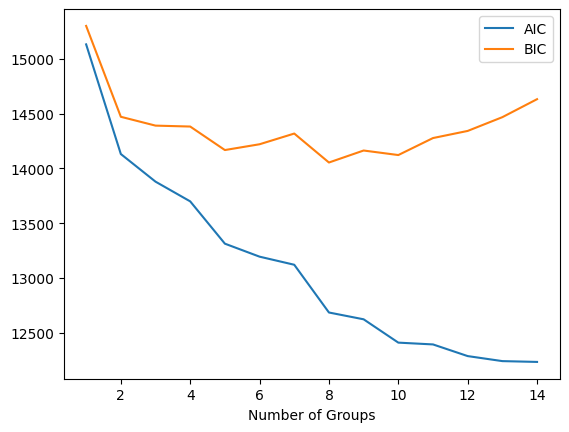

In [22]:
n_components = np.arange(1, 15)
models_country = [GaussianMixture(n, random_state = 10).fit(X_country) for n in n_components]
plt.plot(n_components, [model.aic(X_country) for model in models_country], label = 'AIC')
plt.plot(n_components, [model.bic(X_country) for model in models_country], label = 'BIC')
plt.legend()
plt.xlabel('Number of Groups')
plt.show()

In [23]:
gmm_country = GaussianMixture(n_components = 8, random_state = 10).fit(X_country)

In [43]:
df_country['cluster'] = gmm_country.predict(X_country)

In [44]:
print(df_country.head())
df_country.loc[df_country['country'] == 'India',:]

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster  
0       9.44        56.2       5.82    553        7  
1       4.49        76.3       1.65   4090        1  
2      16.10        76.5       2.89   4460        1  
3      22.40        60.1       6.16   3530        7  
4       1.44        76.8       2.13  12200        6  


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.6,1350,7


In [46]:
df_country = pd.concat([df_country, round(pd.DataFrame(gmm_country.predict_proba(X_country)),2)], axis = 1)
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,0,1,2,3,4,5,6,7
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,7,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0.0,0.98,0.0,0.0,0.0,0.0,0.02,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0.0,0.98,0.0,0.0,0.0,0.0,0.02,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,7,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,6,0.0,0.00,0.0,0.0,0.0,0.0,1.00,0.0


In [52]:
means_df = pd.DataFrame(gmm_country.means_, columns = [X_country.columns])
means_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,36.750000,67.650000,4.127500,46.000000,41375.000000,16.285000,72.025000,3.307500,19100.000000
1,26.006945,38.778805,6.204420,47.280502,9160.819490,6.349577,71.679098,2.543617,4358.387360
2,4.090009,44.039716,10.597506,41.139796,40989.926937,1.079803,80.800003,1.703505,46209.895139
3,5.900000,118.650000,4.790000,82.900000,108350.000000,5.300000,80.400000,1.850000,87650.000000
4,8.175000,102.950000,3.272500,74.000000,71375.000000,10.088500,78.625000,1.767500,38850.000000
5,5.766711,52.656505,8.509908,53.789812,30977.566267,1.699684,79.511058,1.836661,29510.722102
6,13.705272,46.969121,6.390373,45.962598,18859.599266,7.641428,74.305554,1.914301,10798.819236
7,84.697679,27.282470,6.415315,44.678903,2508.506149,12.007702,60.998671,4.634789,1092.602067


In [56]:
df_country.loc[df_country['country'] == 'India',:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,0,1,2,3,4,5,6,7
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.6,1350,7,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.94


In [54]:
df_country.loc[df_country['country'] == 'United States',:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,0,1,2,3,4,5,6,7
159,United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_country.loc[df_country['country'] == 'China',:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,0,1,2,3,4,5,6,7
34,China,15.7,26.3,5.07,22.6,9530,6.94,74.6,1.59,4560,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df_wine = pd.read_csv('/mnt/c/Users/anubh/Downloads/Data Mining for Business in Python/4. Clustering - Gaussian Mixture Model/Wine-quality-challenge.csv')

In [64]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [69]:
df_wine.shape

(1599, 12)

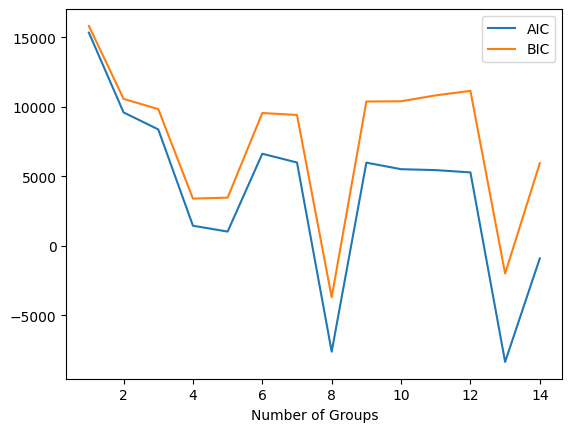

In [68]:
n_components = np.arange(1,15)
models_wine = [GaussianMixture(n_components = n, random_state = 10).fit(df_wine) for n in n_components]
plt.plot(n_components, [model.aic(df_wine) for model in models_wine], label = 'AIC')
plt.plot(n_components, [model.bic(df_wine) for model in models_wine], label = 'BIC')
plt.legend()
plt.xlabel('Number of Groups')
plt.show()

In [72]:
X_wine = df_wine

In [74]:
gmm_wine = GaussianMixture(n_components = 8, random_state = 10).fit(df_wine)
df_wine['cluster'] = gmm_wine.predict(X_wine)

In [75]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [78]:
X_wine = X_wine.drop(columns = 'cluster')

In [79]:
pd.DataFrame(gmm_wine.means_, columns = [X_wine.columns])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.523223,0.607832,0.262536,4.095941,0.075061,14.964699,40.300098,0.997419,3.356197,0.619669,10.603997,5.262392
1,6.883842,0.530954,0.259573,5.922164,0.084037,32.318369,101.034802,0.995548,3.340167,0.625603,11.117914,6.055784
2,8.114389,0.574034,0.232056,2.356814,0.082877,16.835989,56.376465,0.997029,3.314418,0.597713,9.889875,5.000000
3,9.012664,0.396794,0.379099,2.337787,0.075985,13.596566,29.016395,0.996143,3.286400,0.747088,11.414496,7.000000
4,8.402303,0.496768,0.267995,2.262445,0.078435,15.583780,38.994452,0.996605,3.322999,0.663846,10.633923,6.000000
5,7.900000,0.300000,0.680000,8.300000,0.050000,37.500000,283.500000,0.993160,3.010000,0.510000,12.300000,7.000000
6,8.608091,0.552293,0.403330,2.156388,0.257330,15.440871,62.767397,0.997089,3.150557,1.060078,9.913015,5.219442
7,8.281496,0.593365,0.281383,3.435374,0.110231,5.702400,14.583685,0.996766,3.316957,0.677698,10.789084,5.419225


In [48]:
from sklearn.decomposition import PCA

In [ ]:
5. Dimension Reduction

In [6]:
df_houses = pd.read_csv('/mnt/c/Users/anubh/Downloads/Data Mining for Business in Python/5. Dimension Reduction/houses_to_rent.csv')

In [7]:
df_houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,acept,furnished,8000
1,0,64,2,1,1,10,acept,not furnished,820
2,1,443,5,5,4,3,acept,furnished,7000
3,1,73,2,2,1,12,acept,not furnished,1250
4,1,19,1,1,0,0,not acept,not furnished,1200


In [8]:
df_houses[['animal', 'furniture']] = pd.get_dummies(df_houses[['animal', 'furniture']], drop_first = True)

In [9]:
df_houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,False,False,8000
1,0,64,2,1,1,10,False,True,820
2,1,443,5,5,4,3,False,False,7000
3,1,73,2,2,1,12,False,True,1250
4,1,19,1,1,0,0,True,True,1200


In [2]:
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [10]:
X_houses = df_houses.drop(columns = 'rent amount')

NameError: name 'plt' is not defined

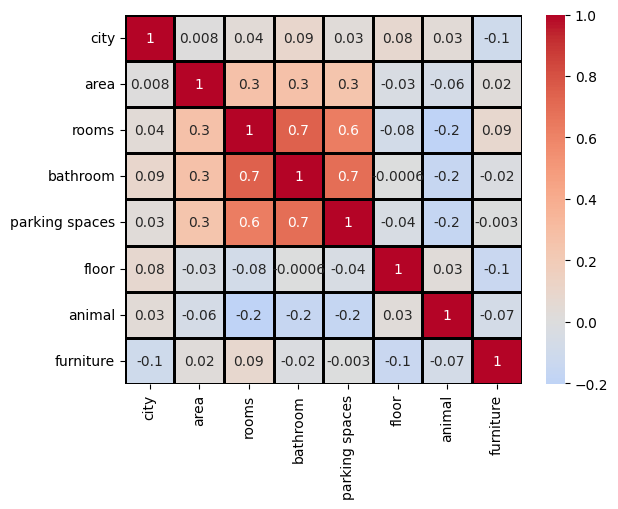

In [11]:
sns.heatmap(X_houses.corr(), annot = True, center = 0, fmt = '.1g', cmap = 'coolwarm', linewidths = 1, linecolor = 'black')
plt.show()

In [103]:
X_houses.corr()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
city,1.000000,0.007710,0.035331,0.089149,0.031027,0.076117,0.033165,-0.107194
area,0.007710,1.000000,0.266957,0.275485,0.252492,-0.031817,-0.064992,0.021375
rooms,0.035331,0.266957,1.000000,0.746876,0.624972,-0.081185,-0.203533,0.087379
bathroom,0.089149,0.275485,0.746876,1.000000,0.685879,-0.000578,-0.153979,-0.017085
parking spaces,0.031027,0.252492,0.624972,0.685879,1.000000,-0.040858,-0.164332,-0.003399
floor,0.076117,-0.031817,-0.081185,-0.000578,-0.040858,1.000000,0.031400,-0.146924
animal,0.033165,-0.064992,-0.203533,-0.153979,-0.164332,0.031400,1.000000,-0.074609
furniture,-0.107194,0.021375,0.087379,-0.017085,-0.003399,-0.146924,-0.074609,1.000000


In [12]:
import matplotlib.pyplot as plt

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
X_houses_scaled = MinMaxScaler().fit_transform(X_houses)

In [26]:
X_houses_scaled  = pd.DataFrame(X_houses_scaled, columns = X_houses.columns)
X_houses_scaled.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,1.0,0.009351,0.222222,0.222222,0.333333,0.000000,0.0,0.0
1,0.0,0.002195,0.111111,0.000000,0.083333,0.101010,0.0,1.0
2,1.0,0.017604,0.444444,0.444444,0.333333,0.030303,0.0,0.0
3,1.0,0.002561,0.111111,0.111111,0.083333,0.121212,0.0,1.0
4,1.0,0.000366,0.000000,0.000000,0.000000,0.000000,1.0,1.0


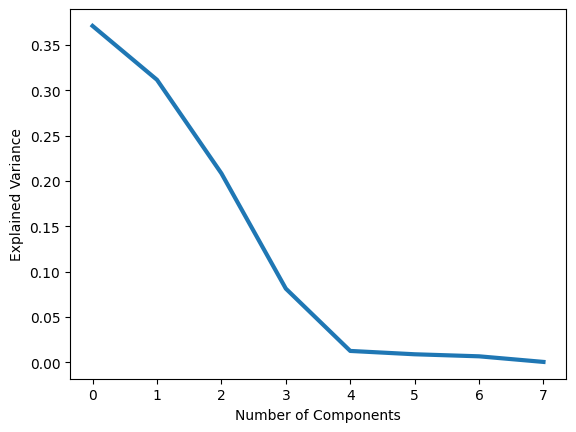

In [31]:
pca_houses = PCA(random_state = 10).fit(X_houses_scaled)
plt.plot(pca_houses.explained_variance_ratio_, linewidth = 3)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

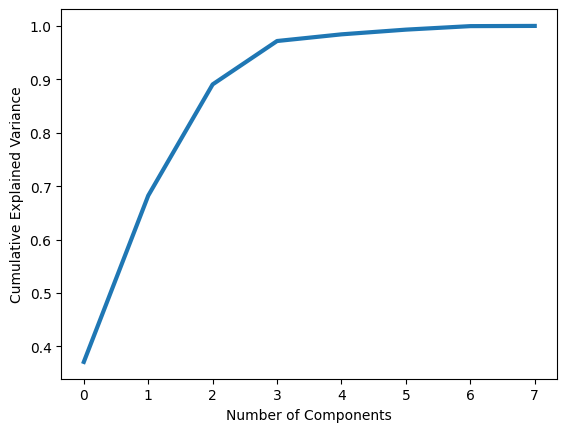

In [32]:
plt.plot(np.cumsum(pca_houses.explained_variance_ratio_), linewidth = 3)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [28]:
pca_houses.explained_variance_ratio_

array([0.37083499, 0.31142513, 0.20826511, 0.08120792, 0.01249882,
       0.00881632, 0.0065677 , 0.00038401])

In [34]:
model_houses = PCA(n_components = 4, random_state = 10).fit(X_houses_scaled)

In [37]:
model_house_df = pd.DataFrame(model_houses.components_, columns = X_houses.columns)

In [38]:
model_house_df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,0.181418,-0.001894,-0.052840,-0.026016,-0.028430,0.020501,0.513750,-0.835731
1,-0.087693,-0.002332,-0.055603,-0.079433,-0.064195,-0.008521,0.847689,0.510033
2,-0.976331,-0.001294,-0.038218,-0.062905,-0.028570,-0.006666,0.009316,-0.201026
3,-0.075883,0.020620,0.487555,0.685306,0.518733,-0.011778,0.131167,-0.005982


Above positive numbers are of the focus. For example first component explain City houses as city is positive and we get floor and animal as positive too while areas, rooms, and others as negative, this represent typical city houses with apartments and less space.

We can name other components like this but they are less obvious, we can use expert knowledge for them for more precise naming.

In [44]:
components_houses = pd.DataFrame(model_houses.transform(X_houses_scaled), 
                                columns = ['City', 'Animal/Furniture +', 'Rural Small', 'Farm Houses/Big Houses'])
components_houses.head()

,City,Animal/Furniture +,Rural Small,Farm Houses/Big Houses
0,0.512212,-0.606922,0.001389,0.138911
1,-0.484093,0.029839,0.801398,-0.128672
2,0.495294,-0.637207,-0.021295,0.399360
3,-0.305152,-0.066853,-0.182058,-0.128640
4,0.217248,0.802227,-0.158314,-0.169636


In [46]:
df_houses_final = pd.concat([components_houses, df_houses], axis = 1)
df_houses_final.head()

,City,Animal/Furniture +,Rural Small,Farm Houses/Big Houses,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,0.512212,-0.606922,0.001389,0.138911,1,240,3,3,4,0,False,False,8000
1,-0.484093,0.029839,0.801398,-0.128672,0,64,2,1,1,10,False,True,820
2,0.495294,-0.637207,-0.021295,0.399360,1,443,5,5,4,3,False,False,7000
3,-0.305152,-0.066853,-0.182058,-0.128640,1,73,2,2,1,12,False,True,1250
4,0.217248,0.802227,-0.158314,-0.169636,1,19,1,1,0,0,True,True,1200


We can't visualize the 4 components and do further analysis, but with this PCA analysis we have removed the multicollinearity hidden in the original dataset by using the 4 components above, and with these as Design Matrix Predictors and Rent Amount as the Depenedent Variable we can perform Regression, GLMs, and other techniques which require no multicollinearity.

In [5]:
from sklearn.manifold import TSNE

In [13]:
tsne_houses = TSNE(n_components = 2, random_state = 10).fit(X_houses)
components_tsne_houses = tsne_houses.fit_transform(X_houses)
components_tsne_houses

array([[ 42.511154 , -57.481003 ],
       [-36.81679  ,   6.8462896],
       [ 74.1458   ,  -5.4687457],
       ...,
       [-51.1329   , -16.907646 ],
       [ 38.055893 ,  54.760906 ],
       [-18.348484 , -42.18997  ]], dtype=float32)

In [16]:
df_houses['rent amount']

0       8000
1        820
2       7000
3       1250
4       1200
        ... 
6075    1150
6076    2900
6077     950
6078    3500
6079    1900
Name: rent amount, Length: 6080, dtype: int64

In [22]:
components_tsne_houses[:,0]

array([ 42.511154, -36.81679 ,  74.1458  , ..., -51.1329  ,  38.055893,
       -18.348484], dtype=float32)

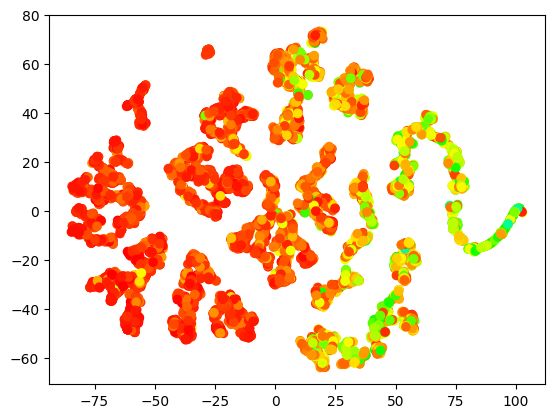

In [25]:
plt.scatter(components_tsne_houses[:,0], components_tsne_houses[:,1], cmap = 'hsv', c = df_houses['rent amount'])

In [26]:
df_abolne = pd.read_csv('/mnt/c/Users/anubh/Downloads/Data Mining for Business in Python/5. Dimension Reduction/abalone-challenge.csv')

In [27]:
df_abolne.head()

,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Rings (+1.5=Years)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [29]:
df_abolne.Sex.value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [31]:
X_abolne = df_abolne.drop(columns = 'Rings (+1.5=Years)')

In [37]:
X_abolne = pd.get_dummies(X_abolne, drop_first = True)

<Axes: >

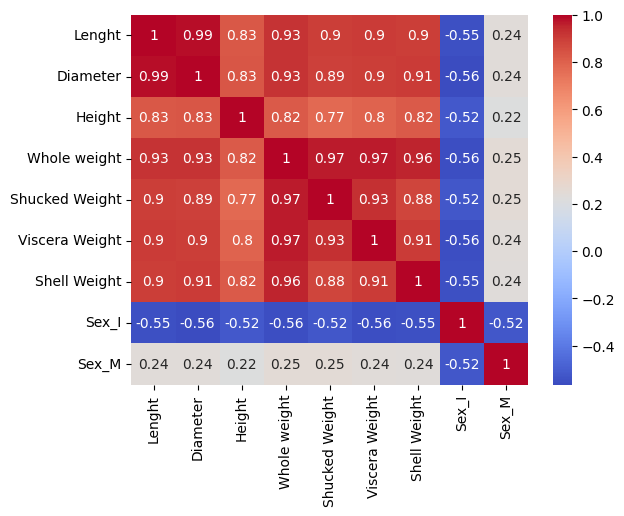

In [41]:
sns.heatmap(X_abolne.corr(), annot = True, cmap = 'coolwarm')

In [46]:
X_abolne_scaled = MinMaxScaler().fit_transform(X_abolne)

In [51]:
pca_abolne = PCA(random_state = 10).fit(X_abolne_scaled)

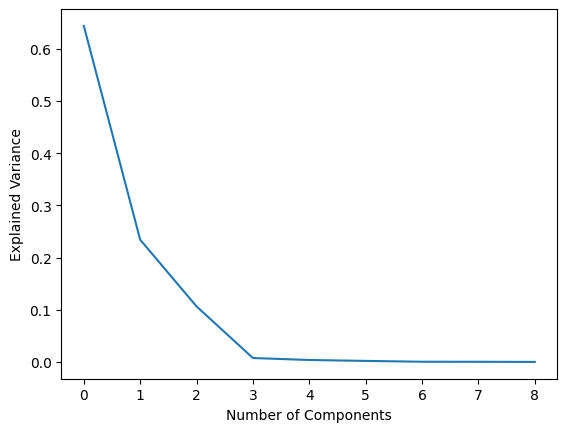

In [58]:
plt.plot(pca_abolne.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

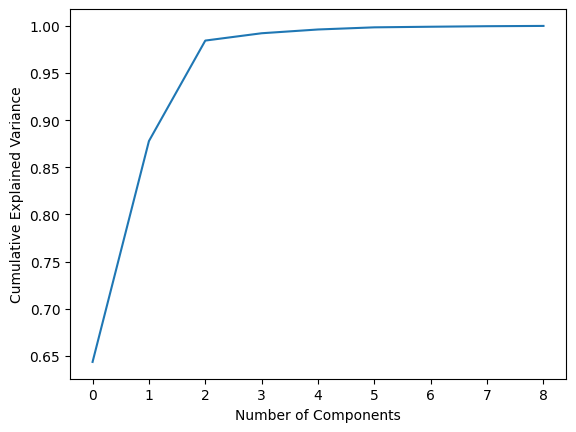

In [60]:
plt.plot(np.cumsum(pca_abolne.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [64]:
model_pca_abolne = PCA(n_components = 3, random_state = 10).fit(X_abolne_scaled)
df_pca_abolne = pd.DataFrame(model_pca_abolne.components_, columns = X_abolne.columns)
df_pca_abolne

,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,0.162097,0.168853,0.033600,0.177639,0.146710,0.145040,0.137066,-0.673094,0.630973
1,0.254843,0.262763,0.051207,0.271986,0.221049,0.223921,0.213838,-0.340180,-0.727296
2,0.294654,0.293744,0.052035,0.329658,0.292162,0.257841,0.245421,0.656281,0.269694


In [68]:
components_abolne = pd.DataFrame(model_pca_abolne.transform(X_abolne_scaled), columns = ['Male', 'Female', 'Infant'])
pca_final_abolne = pd.concat([components_abolne, df_abolne], axis = 1)
pca_final_abolne.head()

,Male,Female,Infant,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Rings (+1.5=Years)
0,0.527362,-0.489425,-0.202499,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.424398,-0.648872,-0.389539,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-0.041043,0.334986,-0.359593,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.527372,-0.489478,-0.202989,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,-0.893228,-0.282824,-0.027395,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [70]:
tsne_abolne = TSNE(n_components = 2, random_state = 10).fit(X_abolne_scaled)
components_tsne_abolne = tsne_abolne.fit_transform(X_abolne_scaled)
components_tsne_abolne

array([[  3.1443026 , -52.455708  ],
       [  8.263111  , -75.4641    ],
       [-19.551182  ,  31.537895  ],
       ...,
       [ 42.459343  ,  -0.25112432],
       [ 15.236536  ,  24.37523   ],
       [ 62.641468  ,  23.85628   ]], dtype=float32)

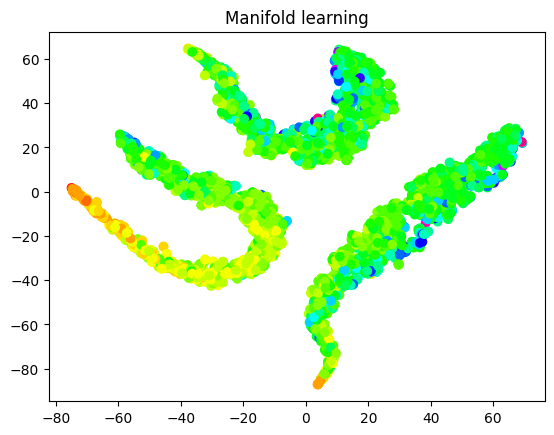

In [75]:
plt.scatter(components_tsne_abolne[:,0], components_tsne_abolne[:,1], c = df_abolne['Rings (+1.5=Years)'], cmap = 'hsv')
plt.title('Manifold learning')
plt.show()

In [77]:
!pip install mlxtend

/bin/bash: /home/anubh/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.9 MB/s eta 0:00:0000:0100:01


In [3]:
from mlxtend.frequent_patterns import association_rules, apriori

In [4]:
import pandas as pd
import numpy as np

In [5]:
df_groceries = pd.read_csv('/mnt/c/Users/anubh/Downloads/Data Mining for Business in Python/6. Association Rule Learning/groceries.csv')

In [6]:
df_groceries.head()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
transactions = []
for i in range(df_groceries.shape[0]):
    transactions.append([str(df_groceries.values[i, j]) for j in range(df_groceries.shape[1])])

In [8]:
transactions[:1]

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan']]

In [17]:
from mlxtend.preprocessing import TransactionEncoder
te_1 = TransactionEncoder()
te_groceries = te_1.fit_transform(transactions)
t_groceries = pd.DataFrame(te_groceries, columns = te_1.columns_)
t_groceries.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
ap_groceries = apriori(t_groceries.drop(columns = 'nan'), min_support = 0.04, use_colnames = True)
output_ap_groceries = association_rules(ap_groceries, metric = 'confidence', min_threshold = 0.3)
output_ap_groceries.sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
4,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,0.483202
2,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929,0.439613
5,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,0.409045
6,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696,0.208496


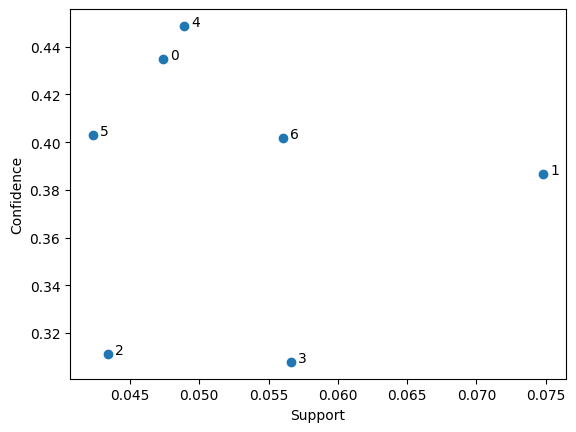

In [44]:
plt.scatter(output_ap_groceries['support'], output_ap_groceries['confidence'])
for i, label in enumerate(output_ap_groceries.index):
    plt.annotate(label, (output_ap_groceries['support'][i]+0.0005, output_ap_groceries['confidence'][i]))
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [102]:
df_restaurant = pd.read_csv('/mnt/c/Users/anubh/Downloads/Data Mining for Business in Python/6. Association Rule Learning/restaurants-challenge.csv')

In [103]:
df_restaurant.head()

,BROOKLYN,Chinese,Z
0,MANHATTAN,American,C
1,BRONX,Chicken,C
2,MANHATTAN,American,A
3,MANHATTAN,American,A
4,MANHATTAN,American,C


In [104]:
df_restaurant = pd.DataFrame(np.vstack([df_restaurant.columns, df_restaurant]), columns = ['Region', 'Cuisine', 'Saintary_Grade'])

In [105]:
df_restaurant.head()

,Region,Cuisine,Saintary_Grade
0,BROOKLYN,Chinese,Z
1,MANHATTAN,American,C
2,BRONX,Chicken,C
3,MANHATTAN,American,A
4,MANHATTAN,American,A


In [109]:
transactions_restaurant = []
for i in range(df_restaurant.shape[0]):
    transactions_restaurant.append([str(df_restaurant.values[i, j]) for j in range(df_restaurant.shape[1])])

transactions_restaurant[:2]

[[' BROOKLYN ', ' Chinese ', ' Z'], [' MANHATTAN ', ' American ', ' C']]

In [112]:
te_restaurant =  TransactionEncoder()
t_restaurant = te_restaurant.fit_transform(transactions_restaurant)

In [113]:
df_t_restaurant = pd.DataFrame(t_restaurant, columns = te_restaurant.columns_)
df_t_restaurant.head()

,A,Afghan,African,American,Armenian,Asian,Australian,B,BRONX,BROOKLYN,...,Southwestern,Spanish,Steak,Tapas,Tex-Mex,Thai,Turkish,Vegetarian,Vietnamese/Cambodian/Malaysia,Z
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
apriori_restaurant = apriori(df_t_restaurant, min_support = 0.03, use_colnames = True)
output_restaurant = association_rules(apriori_restaurant, metric = 'confidence', min_threshold = 0.4)
output_restaurant.sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,( American ),( MANHATTAN ),0.239163,0.412644,0.129866,0.543003,1.315911,0.031177,1.285251,0.315534
11,"( American , B)",( MANHATTAN ),0.061208,0.412644,0.033227,0.542860,1.315563,0.007970,1.284848,0.255508
10,"( American , A)",( MANHATTAN ),0.134401,0.412644,0.072642,0.540487,1.309812,0.017182,1.278213,0.273258
0,( American ),( A),0.239163,0.513078,0.134401,0.561963,1.095279,0.011692,1.111602,0.114336
9,"( American , MANHATTAN )",( A),0.129866,0.513078,0.072642,0.559359,1.090203,0.006010,1.105032,0.095088
8,( C),( MANHATTAN ),0.156339,0.412644,0.066416,0.424819,1.029505,0.001903,1.021167,0.033970
3,( MANHATTAN ),( A),0.412644,0.513078,0.214804,0.520556,1.014574,0.003086,1.015596,0.024457
4,( A),( MANHATTAN ),0.513078,0.412644,0.214804,0.418658,1.014574,0.003086,1.010345,0.029501
1,( BRONX ),( A),0.095203,0.513078,0.047655,0.500555,0.975593,-0.001192,0.974927,-0.026906
2,( BROOKLYN ),( A),0.232748,0.513078,0.116413,0.500167,0.974837,-0.003005,0.974170,-0.032548


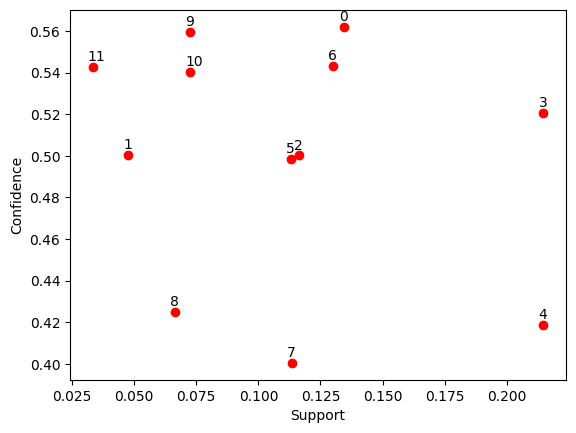

In [139]:
plt.scatter(output_restaurant['support'], output_restaurant['confidence'], c = 'red')
for i, label in enumerate(output_restaurant.index):
    plt.annotate(label, (output_restaurant['support'][i]-0.002, output_restaurant['confidence'][i]+0.003))
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()